In [1]:
# loading the autoscaper for taking reviews from amazon
from autoscraper import AutoScraper
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\mansoor
[nltk_data]     ahamed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# scrapping reviews from amazon

In [2]:
# taking URL and 1st review in the list

In [3]:
url1= "https://www.amazon.in/Redmi-9A-2GB-32GB-Storage/product-reviews/B08696XB4B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
lis1= ["Both 13 MP and 5MP Camera quality is good. Have lot of pre installed apps. But can be uninstalled if not required. Overall good performance . I am using Asus zenfone max and according to me far better than Asus except Camera quality. It comes in 5000 mah battery and one can't get a better option at this price range. Go for it. It's really goodAfter one week useEdit:- please don't buy this phone. It hangs a lot and sometimes there is problem in touch screen."]


In [4]:
scaper= AutoScraper()

In [5]:
result1= scaper.build(url1, lis1)
result1

["Both 13 MP and 5MP Camera quality is good. Have lot of pre installed apps. But can be uninstalled if not required. Overall good performance . I am using Asus zenfone max and according to me far better than Asus except Camera quality. It comes in 5000 mah battery and one can't get a better option at this price range. Go for it. It's really goodAfter one week useEdit:- please don't buy this phone. It hangs a lot and sometimes there is problem in touch screen.",
 "If you are looking for low budget phone this can be a good choice for you.If you wanna android phone just for day to day work then it's really good.On playing heavy games it will hange obviously. Camera is fine at this range. When you start your new device it take some time but later it will work smoothly.Phone is light weight with a good look",
 "Excellent mobile for daily use @7500/-. Don't belive in negative reviews at all. If course the product parts made in China, entire assembly, software all are of India. Even this mobi

In [6]:
url2="https://www.amazon.in/Redmi-9A-2GB-32GB-Storage/product-reviews/B08696XB4B/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2"
lis2= [" Cheap & Best phone in this range"]


In [7]:
result2= scaper.build(url2, lis2)
result2

['Cheap & Best phone in this range',
 "1. Display is excellent. Colors and sharpness is good.2. Descent cameras according to price.3. In hand feel of phone is good. It's slim and despite 5000 Mah battery, it feels light.4. Battery backup is good. Easily last one day.5. Performance is good according to price. Mediatek G25 does it job well. You can play COD and FREE FIRE easily at low settings.6. Speaker loudness is average but quality is good.7. MIUI 12 experience is amazing. No ads and reduced bloatware.",
 'Points to be noted:👉 The sound output of this phone is quite low as compared to other Redmi phones.👉 This phone is much longer than other Redmi phones which can make it difficult to carry.👉 Xiaomi previously provided IR blaster on its budget phones. It is now extinct in their budget phones.👉 Xiaomi started giving "Type-C" port by upgrading its budget phones from Micro USB port, but after buying this phone I feel that now they have shifted to "Micro USB" port again.👉 After purchasin

In [8]:
url3= "https://www.amazon.in/Redmi-9A-2GB-32GB-Storage/product-reviews/B08696XB4B/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3"
lis3= ["Good battery. But phone hangs a.lot. need to restart multiple times"]

In [9]:
result3= scaper.build(url3, lis3)
result3

["Bought 3gb 32gb sea blue variant.Very nice and smooth looking phone.Runs smoothly without any hiccups.The blue color is so amazing.Doesn't heat with prolonged use.Amazing battery, drains slowly and charges quickly.Display is very good.Quick delivery.Overall a must buy.",
 'Good battery. But phone hangs a.lot. need to restart multiple times',
 "Best phone @6800 Rs.Suitable for Parents and kids for online study.Has no standard features like fingerprint scanner, dual camera, IR blaster, type C charging port, no back cover.But at this price in COVID situation, it's the best. Display is huge(20:9).Camera is above par.Performance is good.Overall best package.5/5 for Rs.6800.",
 'Do not go for it...First mobile from Redmi who have lots of issue...I boot my phone and it hang... Touch not working properly...screen is largeSlow working.....',
 "It's a beast in its segment. I was little worried about G25 but it handles daily tasks well. Take the 3GB variant as 2gb may feel sluggish. It's not bu

In [10]:
result1= pd.DataFrame(result1)
result2 = pd.DataFrame(result2)
result3 = pd.DataFrame(result3)

In [11]:
reviews = pd.concat([result1, result2, result3], axis=0).reset_index(drop=True)
reviews.columns=["Comments"]
reviews.head()

,Comments
0,Both 13 MP and 5MP Camera quality is good. Hav...
1,If you are looking for low budget phone this c...
2,Excellent mobile for daily use @7500/-. Don't ...
3,"If I started to rating it's all features, it w..."
4,"I purchased it for my Mother, Decent product i..."


# Data preprocessing

In [12]:
import re
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\mansoor
[nltk_data]     ahamed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\mansoor
[nltk_data]     ahamed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
lemmatizer=WordNetLemmatizer()

In [14]:
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in range(0, len(reviews)):
    cleaned= re.sub('[^a-zA-Z]', " ", reviews["Comments"][i]) 
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

In [15]:
data=pd.DataFrame({"comments": corpus})
data

,comments
0,mp mp camera quality good lot pre installed ap...
1,looking low budget phone good choice wanna and...
2,excellent mobile daily use belive negative rev...
3,started rating feature followed processor disp...
4,purchased mother decent product price range lo...
5,covid drastically changed everything look disp...
6,review one day full usage day usage overall di...
7,compass working showing error required sensor ...
8,made china country origin mentioned descriptio...
9,made china product


In [16]:
corpus

['mp mp camera quality good lot pre installed apps uninstalled required overall good performance using asus zenfone max according far better asus except camera quality come mah battery one get better option price range go really goodafter one week useedit please buy phone hang lot sometimes problem touch screen',
 'looking low budget phone good choice wanna android phone day day work really good playing heavy game hange obviously camera fine range start new device take time later work smoothly phone light weight good look',
 'excellent mobile daily use belive negative review course product part made china entire assembly software india even mobile bloat ware chinese apps gb variant excellent black colour look great camera good price range autofocus ai potrait feature regarding battery really huge normal daily usage last hr experience heavy usage gaming last hr regarding gaming since gaming processor helio g equal snapdragon hyperdrive technology lag gaming better network connectivity m

In [17]:
joined_data=" ".join(corpus)
print(joined_data)

mp mp camera quality good lot pre installed apps uninstalled required overall good performance using asus zenfone max according far better asus except camera quality come mah battery one get better option price range go really goodafter one week useedit please buy phone hang lot sometimes problem touch screen looking low budget phone good choice wanna android phone day day work really good playing heavy game hange obviously camera fine range start new device take time later work smoothly phone light weight good look excellent mobile daily use belive negative review course product part made china entire assembly software india even mobile bloat ware chinese apps gb variant excellent black colour look great camera good price range autofocus ai potrait feature regarding battery really huge normal daily usage last hr experience heavy usage gaming last hr regarding gaming since gaming processor helio g equal snapdragon hyperdrive technology lag gaming better network connectivity make game a

# Applying bag of N grams

In [18]:
#import pakages
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow=cv.fit_transform(corpus).toarray()
print(cv.vocabulary_)

{'mp': 280, 'camera': 63, 'quality': 355, 'good': 180, 'lot': 245, 'pre': 332, 'installed': 215, 'apps': 16, 'uninstalled': 447, 'required': 374, 'overall': 308, 'performance': 315, 'using': 459, 'asus': 20, 'zenfone': 479, 'max': 258, 'according': 2, 'far': 148, 'better': 41, 'except': 140, 'come': 87, 'mah': 251, 'battery': 33, 'one': 303, 'get': 174, 'option': 305, 'price': 338, 'range': 360, 'go': 179, 'really': 363, 'goodafter': 181, 'week': 470, 'useedit': 456, 'please': 323, 'buy': 60, 'phone': 316, 'hang': 191, 'sometimes': 412, 'problem': 342, 'touch': 442, 'screen': 383, 'looking': 244, 'low': 249, 'budget': 57, 'choice': 75, 'wanna': 464, 'android': 13, 'day': 105, 'work': 475, 'playing': 322, 'heavy': 195, 'game': 168, 'hange': 192, 'obviously': 299, 'fine': 156, 'start': 418, 'new': 291, 'device': 115, 'take': 430, 'time': 438, 'later': 226, 'smoothly': 408, 'light': 233, 'weight': 471, 'look': 243, 'excellent': 139, 'mobile': 272, 'daily': 103, 'use': 455, 'belive': 37, '

In [19]:
bow=pd.DataFrame(bow)
bow.head()

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,474,475,476,477,478,479
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0


In [20]:
from wordcloud import wordcloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

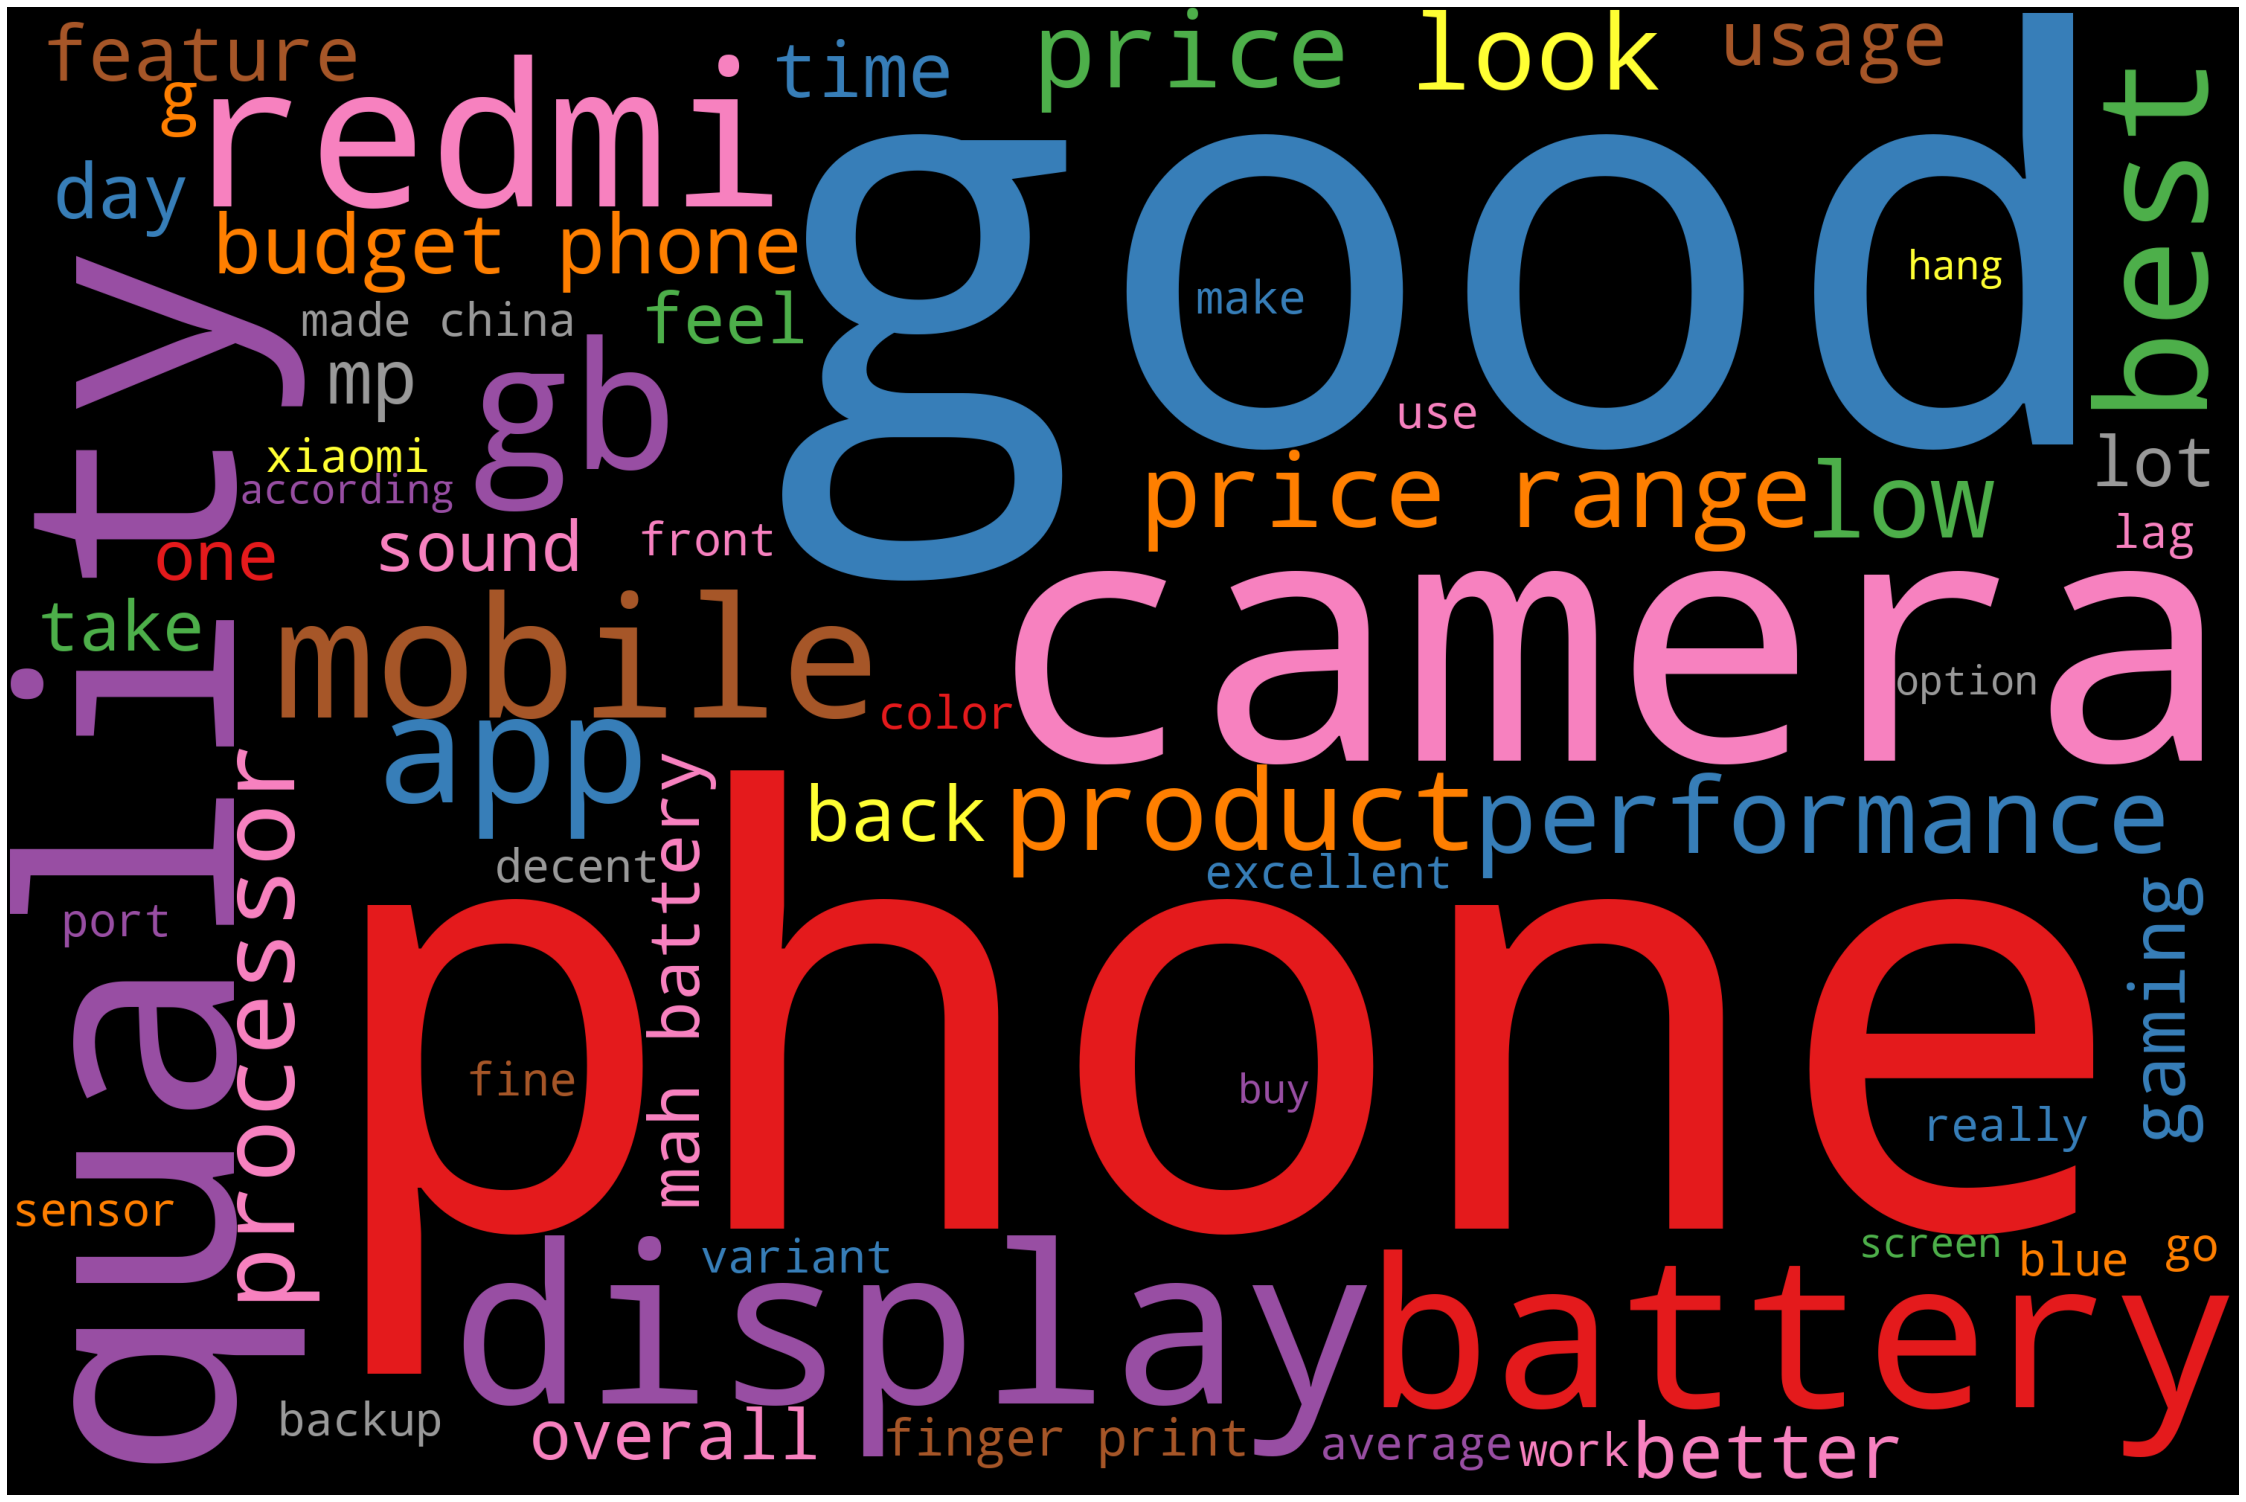

In [21]:
#define a fuction to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

#generating word cloud
#stopwords
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=60,
                   colormap='Set1',stopwords=STOPWORDS).generate(joined_data)
plot_cloud(wordcloud)

# Sentiment Analysis

In [27]:
from afinn import Afinn
import seaborn as sns

In [28]:
af= Afinn(language='en', emoticons=False, word_boundary=True)
# user Defined function to measure affinty scores
def score_cal(texts):
    score=[]
    for i in range(0, len(texts)):
        sent_score= 0
        words= texts[i].split()
        for i in range(0, len(words)):
            af_score= af.score(words[i])
            sent_score += af_score
        score.append(sent_score)
    return score

In [29]:
score=score_cal(corpus)
score

[13.0,
 11.0,
 15.0,
 3.0,
 28.0,
 9.0,
 3.0,
 0.0,
 -3.0,
 0.0,
 3.0,
 23.0,
 -2.0,
 -3.0,
 -1.0,
 2.0,
 3.0,
 2.0,
 16.0,
 3.0,
 14.0,
 3.0,
 17.0,
 0.0,
 -3.0,
 1.0,
 9.0,
 32.0,
 3.0,
 5.0]

In [30]:
print(len(score))
print(len(corpus))

30
30


In [31]:
sentiment_df= pd.DataFrame({"Comment": corpus, "Sentiment_val": score })
sentiment_df

,Comment,Sentiment_val
0,mp mp camera quality good lot pre installed ap...,13.0
1,looking low budget phone good choice wanna and...,11.0
2,excellent mobile daily use belive negative rev...,15.0
3,started rating feature followed processor disp...,3.0
4,purchased mother decent product price range lo...,28.0
5,covid drastically changed everything look disp...,9.0
6,review one day full usage day usage overall di...,3.0
7,compass working showing error required sensor ...,0.0
8,made china country origin mentioned descriptio...,-3.0
9,made china product,0.0
